# 08. 순환 신경망(Recurrent Neural Network)

## 1) 순환 신경망(Recurrent Neural Network, RNN)

* 피드 포워드 신경망의 한계
  * 피드 포워드 신경망은 **입력의 길이가 고정**되어 자연어 처리에 한계
  * 다양한 길이의 입력 시퀀스를 처리할 수 있는 인공 신경망이 필요
* 순환 신경망(Recurrent Neural Network, RNN) 
  * 자연어 처리에 대표적으로 사용되는 인공 신경망
    * 재귀 신경망(Recursive Neural Network)은 전혀 다른 개념
  * 입력과 출력을 시퀀스 단위로 처리하는 **시퀀스(Sequence) 모델**
    * 입력 시퀀스 => 출력 시퀀스 (번역기)
  * RNN 모델
    * 기본적인 순환 신경망인 바닐라 RNN
    * 바닐라 RNN의 단점을 개선한 LSTM, GRU

### 1.1. 순환 신경망(Recurrent Neural Network)

* RNN과 FFNN의 비교
  * FFNN: 은닉층에서 활성화 함수의 결과를 출력층으로 보냄

    ![img](https://wikidocs.net/images/page/24987/mlp_final.PNG)
    
  * RNN: 은닉층에서 활성화 함수의 결과를 **출력층** 방향으로도, 다시 은닉층 노드의 다음 계산의 **입력**으로도 보냄

    ![img](https://wikidocs.net/images/page/24987/rnn_final.PNG)

* RNN의 구성
    
    ![img](https://wikidocs.net/images/page/22886/rnn_image3.5.PNG)
    
    ![img](https://wikidocs.net/images/page/22886/rnn_image1_ver2.PNG)

  * 입력 벡터 $x$
  * 출력 벡터 $y$
  * 셀 (Cell)
    * 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드
    * 이전의 값을 기억하려고 하는 일종의 메모리 역할도 수행(RNN셀/메모리셀)

* 메모리 셀

  ![img](https://wikidocs.net/images/page/22886/rnn_image2_ver3.PNG)
  * 메모리 셀은 바로 이전 시점 은닉층의 메모리 셀에서 나온 값을 입력으로 사용(재귀적 활동)
  * 현재 시점을 변수 $t$로 표현
    * $t$에서의 메모리 셀의 값은 과거의 메모리 셀들의 값에 영향을 받은 것을 의미
  * **은닉 상태**: 메모리 셀이 출력층 방향 또는 다음 시점인 t+1의 자신에게 보내는 값
    * $t$ 시점의 메모리 셀은 $t-1$ 시점의 메모리 셀이 보낸 은닉 상태값을 은닉 상태 계산을 위한 입력값으로 사용

* RNN의 뉴런 단위 시각화

  ![img](https://wikidocs.net/images/page/22886/rnn_image2.5.PNG)

  * RNN 시점: 입력 벡터 차원 4, 은닉 상태 2, 출력 백터 차원 2
  * 뉴런 단위: 입력층 뉴런 수 4, 은닉층 뉴런 수 2, 출력층 뉴런 수 2

* 입출력에 따른 RNN 분류

  ![img](https://wikidocs.net/images/page/22886/rnn_image3_ver2.PNG)

  * 입출력의 단위는 **단어 벡터**
  * 일 대 다 구조: 하나의 시퀀스 입력에 대해 여러 개의 시퀀스 출력 (이미지 캡셔닝, [퀵 드로우](https://quickdraw.withgoogle.com/?locale=ko))
  * 다 대 일 구조: 여러 단어 시퀀스에 대해 하나의 출력 (긍정/부정 분류, 스팸메일 분류 등)
  * 다 대 다 구조: 문장을 입력하면 문장을 출력 (챗봇, 번역기, 태깅)

* RNN 수식

  ![img](https://wikidocs.net/images/page/22886/rnn_image4_ver2.PNG)

  * 현재 시점: $t$
  * 은닉 상태 값: $h_t$
  * 은닉층: $h_t = tanh(W_xx_t + W_hh_{t-1}+b)$
  * 출력층: $y_t = f(W_yh_t + b)$<br>단, $f$는 비선형 활성화 함수 중 하나

* 출력층의 활성화 함수
  * 비선형 함수를 사용하는 이유
    * 선형 함수인 $ℎ(𝑥)=𝑐𝑥$를 활성 함수로 사용한 3층 네트워크를 가정
    * 이를 식으로 나타내면 $𝑦(𝑥)=ℎ(ℎ(ℎ(𝑥)))$
      * 이 계산은 $𝑦(𝑥)=𝑐∗𝑐∗𝑐∗𝑥$처럼 세번의 곱셈을 수행
      * $𝑎=𝑐3$ 또는 $𝑦(𝑥)=𝑎𝑥$와 똑같음
      * **즉 은닉층이 없는 네트워크**
    * 층을 쌓는 혜택을 얻으려면 활성함수로는 반드시 비선형함수를 사용해야 함
  * 분류에 따른 활성화 함수
    * 이진 분류: 출력층에 로지스틱 회귀를 사용하여 시그모이드 함수를 사용
    * 다중 클래스 분류: 출력층에 소프트맥스 회귀를 사용하여로 소프트맥스 함수를 사용할 수 있습니다.






### 1.2. 케라스(Keras)로 RNN 구현하기

* RNN층 추가하는 코드
```python
from tensorflow.keras.layer import SimpleRNN
...
# 기본 구성
moddel.add(SimpleRNN(hidden_units))
# 추가 인자를 사용할 때
model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
# 다른 표기
model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N))
```
​    ![img](https://wikidocs.net/images/page/22886/rnn_image6between7.PNG)
* RNN의 파라미터    
  * **hidden_units (output_dim)**
    * 은닉 상태의 크기: RNN의 용량(capacity)을 늘림
    * t의 메모리 셀이 t+1 메모리 셀 혹은 출력층으로 보내는 값의 크기
    * 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가짐
  * **input_dim**: 입력의 크기
  * **timesteps (input_length)**: 입력 시퀀스의 길이. 시점의 수
  * **batch_size**: 한 번에 학습하는 데이터의 개수
  * RNN 층(hidden_units)은 3D 텐서(input_dim X timesteps X batch_size)를 입력 받음
    
* RNN의 출력 방식

  ![img](https://wikidocs.net/images/page/22886/rnn_image8_ver2.PNG)

  * RNN 층은 사용자의 설정에 따라 두 가지 종류의 출력 방식
    * RNN 층의 return_sequences (True/Fasle) 파라미터로 설정이 가능
    * output_dim은 앞서 코드에서 정의한 hidden_units의 값으로 설정됨
  * return_sequence=False: 최종 시점 메모리셀이 (batch_size, output_dim) 크기의 2D 은닉 상태 값 출력 (다 대 일)
  * return_sequence=True: 모든 시점의 메모리셀들이 (batch_size, timesteps, output_dim) 크기의 3D 은닉 상태 값 출력 (다 대 다)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
# batch_size=None => Output Shape이 (None, 3)
model.add(SimpleRNN(3, input_length=2, input_dim=10))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = Sequential()
# batch_size=10 => Output Shape이 (8, 3)
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [14]:
model = Sequential()
# 다 대 다 출력
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### 1.3. 파이썬으로 RNN 구현하기
* 은닉 상태 값 출력 실습
$$h_t=tanh(W_xX_t+W_hh_{t-1}+b)$$

In [15]:
'''
RNN 모델 값 설정
'''
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
# 실제는 (batch_size, timesteps, input_dim)의 크기의 3D 텐서를 입력
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
'''
가중치, 편향 초기화
'''
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [17]:
total_hidden_states = []

# 각 시점 별 입력값
for input_t in inputs:

  # Wx * Xt + Wh * Ht-1 + b(bias)
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
  # 각 시점의 은닉 상태의 값을 계속해서 누적
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0) 

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(*total_hidden_states, sep='\n')

모든 시점의 은닉 상태 :
[0.83549624 0.85305696 0.93399967 0.9394665  0.90725756 0.96834146
 0.93806217 0.69785376]
[0.99961479 0.99999042 0.99973989 0.9999951  0.99996938 0.99998666
 0.99998926 0.9999447 ]
[0.99970956 0.99999193 0.99938895 0.99999722 0.99995873 0.99996185
 0.99998569 0.99990751]
[0.99963579 0.99999293 0.99890519 0.99999616 0.99996362 0.99996536
 0.99999094 0.99994499]
[0.99981331 0.99999583 0.99985465 0.99999845 0.99998188 0.99999203
 0.99999544 0.99997859]
[0.99918716 0.99998831 0.99927772 0.99999252 0.99993024 0.99995378
 0.99998388 0.9999602 ]
[0.99954148 0.99998701 0.99934196 0.99999458 0.99992479 0.99995715
 0.99998696 0.99996317]
[0.9998609  0.99998963 0.9989829  0.99999775 0.9999474  0.9999563
 0.99999064 0.99992411]
[0.99965273 0.99998711 0.99949052 0.99999665 0.99992788 0.99993849
 0.99997293 0.99986816]
[0.99969148 0.99998464 0.99933431 0.99999599 0.99991152 0.99994179
 0.9999821  0.99993103]


### 1.4. 깊은 순환 신경망(Deep Recurrent Neural Network)

![img](https://wikidocs.net/images/page/22886/rnn_image4.5_finalPNG.PNG)

* 다수의 은닉층을 가진 RNN
* 위 그림은 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 순환 신경망

* 코드 구현

In [18]:
# 은닉층을 2개 추가한 코드
model = Sequential()
# 첫번째 은닉층의 은닉 상태 값을 다음 은닉층에 보내야하므로 return_sequences = True를 설정
model.add(SimpleRNN(hidden_units, input_length=10, input_dim=5, return_sequences=True))
model.add(SimpleRNN(hidden_units, return_sequences=True))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 10, 8)             112       
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 10, 8)             136       
                                                                 
Total params: 248
Trainable params: 248
Non-trainable params: 0
_________________________________________________________________


### 1.5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)
* 양방향 순환 신경망 아이디어

  * 시점 t에서의 출력값을 예측할 때 이전 시점의 입력뿐만 아니라, 이후 시점의 입력 또한 예측에 기여

  * 양방향 RNN은 이전과 이후의 시점 모두를 고려해서 현재 시점의 예측을 더욱 정확하게 함

    ```
    운동을 열심히 하는 것은 [        ]을 늘리는데 효과적이다.
    
    1) 근육
    2) 지방
    3) 스트레스
    ```
    ![img](https://wikidocs.net/images/page/22886/rnn_image3.5.PNG)
    ![img](https://wikidocs.net/images/page/22886/rnn_image5_ver2.PNG)

* 양방향 RNN 구조

  * 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용
  * 첫번째 메모리 셀은 ***t-1*의 은닉 상태(Forward States)** 를 전달받아 *t*의 은닉 상태 계산
  * 두번째 메모리 셀은 ***t+1*의 은닉 상태(Forward States)** 를 전달받아 *t*의 은닉 상태 계산
  * 이 두 개의 값 모두 현재 시점의 출력층에서 출력값을 예측하기 위해 사용

In [19]:
from tensorflow.keras.layers import Bidirectional

timesteps = 10
input_dim = 5

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirectio  (None, 10, 16)           224       
 nal)                                                            
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


* 깊은 양방향 RNN

  ![img](https://wikidocs.net/images/page/22886/rnn_image6_ver3.PNG)

  * 양방향 RNN도 다수의 은닉층을 가질 수 있음
    * 위 그림은 은닉층이 2개인 깊은(deep) 양방향 순환 신경망
    * 양방향 RNN은 태깅 작업 챕터에서 실습
  * 은닉층이 무조건 많다고 해서 모델의 성능이 좋아지는 것은 아님
    * 은닉층을 추가하면 학습할 수 있는 양은 많아지지만, 훈련 데이터 또한 많은 양이 필요

  * 아래의 코드는 은닉층이 4개인 RNN



In [20]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 10, 16)           224       
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 10, 16)           400       
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 10, 16)           400       
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 10, 16)           400       
 nal)                                                            
                                                                 
Total params: 1,424
Trainable params: 1,424
Non-train

### 1.6. 점검 퀴즈

* 모델에 대한 설명이 다음과 같을 때, 총 파라미터 개수를 구하여라.

  1. Embedding을 사용하며, 단어 집합(Vocabulary)의 크기가 5,000이고 임베딩 벡터의 차원은 100
  2. 은닉층에서는 Simple RNN을 사용하며, 은닉 상태의 크기는 128
  3. 훈련에 사용하는 모든 샘플의 길이는 30으로 가정
  4. 이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용
  5. 은닉층은 1개

* 참고

  ![img](https://wikidocs.net/images/page/22886/rnn_images4-5.PNG)

In [21]:
from keras.layers import Embedding, Dense

vocab_size = 5000
embedding_dim = 100
hidden_size = 128

model = Sequential()
# 입력 벡터
model.add(Embedding(vocab_size, embedding_dim)) # 100*5,000
# 메모리 셀 (ℎ𝑡 = 𝑊𝑋+𝑊ℎ+𝑏)
model.add(SimpleRNN(hidden_size))               # (128*100)+(128*128)+128
# 출력 벡터
model.add(Dense(1, activation='sigmoid'))       # 128+1
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, 128)               29312     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 529,441
Trainable params: 529,441
Non-trainable params: 0
_________________________________________________________________


---

## 2) 장단기 메모리(Long Short-Term Memory, LSTM)

* 가장 단순한 형태의 RNN을 바닐라 RNN(Vanilla RNN)(케라스에서는 SimpleRNN)
* 바닐라 RNN의 한계를 극복하기 위해 LSTM과 같은 다양한 RNN의 변형이 나옴 

### 2.1. 바닐라 RNN의 한계

* 출력 결과가 이전의 계산 결과에 의존

  ![img](https://wikidocs.net/images/page/22888/lstm_image1_ver2.PNG)
  * 바닐라 RNN은 비교적 짧은 시퀀스(sequence)에 대해서만 효과
  * 바닐라 RNN의 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생
  * 뒤로 갈수록 x1의 정보량은 손실되고, 시점이 충분히 긴 상황에서는 x1의 전체 정보에 대한 영향력은 거의 의미가 없을 수도 있음
* 문서의 특성(두괄식)에 따라 가장 중요한 정보가 시점의 앞 쪽에 위치할 수도 있음
  ```
  모스크바에 여행을 왔는데 건물도 예쁘고 먹을 것도 맛있었어. 
  그런데 글쎄 직장 상사한테 전화가 왔어. 
  어디냐고 묻더라구 그래서 나는 말했지. 
  저 여행왔는데요. 여기 ______
  ```
  * 다음 단어를 예측하기 위해서는 장소 정보가 필요. 장소 정보에 해당되는 단어인 '모스크바'는 앞에 위치
  * RNN이 충분한 기억력을 가지고 있지 못한다면 다음 단어를 엉뚱하게 예측

* 이를 **장기 의존성 문제(the problem of Long-Term Dependencies)**라 함

### 2.2. 바닐라 RNN 내부 열어보기

![img](https://wikidocs.net/images/page/22888/vanilla_rnn_ver2.PNG)

* RNN 계열의 인공 신경망의 그림에서는 편향 b를 생략합니다
  * 편향 b를 그린다면 xt 옆에 tanh로 향하는 또 하나의 입력선

* $h_t=tanh(W_xx_t+W_hh_{t−1}+b)$
  * $x_t$와 $h_{t−1}$이라는 두 개의 입력이 각 가중치$w$와 곱해져서 메모리 셀의 입력이 됨
  * 이를 하이퍼볼릭탄젠트 활성 함수의 결과로 은닉층의 출력인 은닉 상태가 됨

### 2.3. LSTM(Long Short-Term Memory)

* LSTM의 내부

  ![img](https://wikidocs.net/images/page/22888/vaniila_rnn_and_different_lstm_ver2.PNG)
  * 장단기 메모리(Long Short-Term Memory, LSTM): 바닐라 RNN의 장기 의존성 문제를 보완한 RNN의 일종
    * RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능
  * LSTM은 은닉층의 메모리 셀: 불필요한 기억을 지우고, 기억해야할 것들을 정함
    * 입력 게이트
    * 삭제 게이트
    * 출력 게이트
  * 셀 상태(cell state): $t$시점의 셀 상태를 $C_t$로 표현

* 셀 상태

  ![img](https://wikidocs.net/images/page/22888/cellstate.PNG)

  * 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로서 사용
  * 은닉 상태의 값과 셀 상태의 값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용
    * 각 게이트는 공통적으로 시그모이드 함수가 존재
    * 시그모이드 함수를 지난 0과 1사이의 출력 값으로 게이트를 조절
  * 셀 상태의 수식
    - $σ$: 시그모이드 함수
    - $tanh$: 하이퍼볼릭탄젠트 함수
    - $W_{xi},W_{xg},W_{xf},W_{xo}$: $x_t$와 함께 각 게이트에서 사용되는 4개의 가중치
    - $W_{hi},W_{hg},W_{hf},W_{ho}$: $h_{t−1}$와 각 게이트에서 사용되는 4개의 가중치
    - $b_i,b_g,b_f,b_o$: 각 게이트에서 사용되는 4개의 편향

#### **(1) 입력 게이트**

![img](https://wikidocs.net/images/page/22888/inputgate.PNG)

* 현재 정보를 기억하는 게이트
* **$i_t=σ(W_{xi}x_t+W_{hi}h_{t−1}+b_i)$**
  * $t$(현 시점)의 $x$값과 입력 게이트로 이어지는 가중치 $Wxi$를 곱한 값 
  * $t-1$(이전 시점)의 은닉 상태가 입력 게이트로 이어지는 가중치 $W_{hi}$를 곱한 값
  * 이 둘을 더하여 시그모이드 함수를 지남 (0~1 사이의 값)
* **$g_t=tanh(W_{xg}x_t+W_{hg}h_{t−1}+b_g)$**
  * $t$의 $x$값과 입력 게이트로 이어지는 가중치 $Wxg$를 곱한 값 
  * $t-1$의 은닉 상태가 입력 게이트로 이어지는 가중치 $W_{hg}$를 곱한 값
  * 이 둘을 더하여 하이퍼볼릭탄젠트 함수를 지남 (-1~1 사이의 값)
* 이 두 개의 값을 가지고 이번에 선택된 기억할 정보의 양을 정함
  * 구체적으로 어떻게 결정하는지는 아래에서 배우게 될 셀 상태 수식을 참고

#### **(2) 삭제 게이트**

![img](https://wikidocs.net/images/page/22888/forgetgate.PNG)

* 기억을 삭제하기 위한 게이트
* **$f_t=σ(W_{xf}x_t+W_{hf}h_{t−1}+b_f)$**
  * $t$의 $x$값과 $t-1$의 은닉 상태가 시그모이드 함수를 지남 (0~1 사이의 값)
  * 이 값이 삭제 과정을 거친 정보의 양 (0 정보 삭제, 1 정보 기억)
* 이를 가지고 셀 상태를 구함
  * 구체적으로 어떻게 결정하는지는 아래에서 배우게 될 셀 상태 수식을 참고

#### **(3) 셀 상태**

![img](https://wikidocs.net/images/page/22888/cellstate2.PNG)

* 삭제 게이트에서 일부 기억을 잃은 상태
* **$C_t=f_t∘C_{t−1}+i_t∘g_t$**
  * 입력 게이트에서 구한 $i_t, g_t$ 의 값에 원소별 곱(entrywise product). 선택된 기억할 값이라 함
    * 같은 크기의 두 행렬이 있을 때 같은 위치의 성분끼리 곱
    *  ∘ 로 표현
  * 선택된 기억할 값에 삭제 게이트의 결과값과 더함. t의 셀 상태라고 함
    * 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미
    * 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정
* 이 값은 다음 t+1의 LSTM 셀로 넘겨짐

#### **(4) 출력 게이트와 은닉 상태**

![img](https://wikidocs.net/images/page/22888/outputgateandhiddenstate.PNG)

* 출력 게이트
  * **$o_t=σ(W_{xo}x_t+W_{ho}h_{t−1}+b_o)$**
    * t의 x값과 t-1의 은닉 상태가 시그모이드 함수를 지난 값
  * 해당 값은 현재 시점 t의 은닉 상태를 결정

* 은닉 상태
  * **$h_t=o_t∘tanh(c_t)$**
    * 셀 상태의 값이 하이퍼볼릭탄젠트 함수를 지남 (-1~1사이의 값)
    * 이 값은 출력 게이트의 값과 연산. 값이 걸러지는 효과가 발생하여 은닉 상태가 됨
  * 은닉 상태의 값은 또한 출력층으로도 향함

## 3) 게이트 순환 유닛(Gated Recurrent Unit, GRU)

### GRU(Gated Recurrent Unit : 게이트 순환 유닛)

1. 2014년 뉴욕대학교 조경현 교수님이 집필한 논문에서 제안되었다.

2. 장단기 메모리(Long Short-Term Memory, LSTM)의 장기 의존성 문제에 대한 해결책을 유지하면서, 은닉 상태를 업데이트하는 계산을 줄였다.

    **장기기 의존성 문제** 

    >- 문장이 길면 이전의 정보가 마지막까지 전달되지 못하는 문제
    >- 이를 보정하기 위해서 Attention이라는 개념이 등장

    **은닉 상태**
    >- 입력층의 노드에서 받은 정보를 은닉층의 노드에서 연산 후, 결과값을 출력층과 다시 은닉층의 노드로 보낸다. 
    >- 이때 두 뱡향으로 내보내지는 결과를 은닉 상태 라고 합니다.
    >- 여기서 은닉층의 노드를 '메모리셀' 또는 'RNN셀' 이라고도 합니다.
    >- 즉, GRU는 성능은 LSTM과 유사하면서 복잡했던 LSTM의 구조를 간단화 시켰습니다.
    
    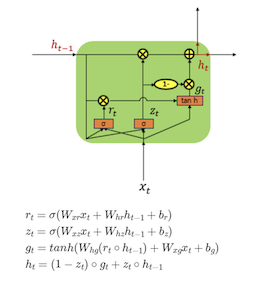
  - LSTM에서는 출력, 입력, 삭제 게이트라는 3개의 게이트가 존재했습니다.
  - GRU에서는 업데이트 게이트와 리셋 게이트 두 가지 게이트만이 존재합니다.

3. LSTM을 사용하면서 최적의 하이퍼파라미터를 찾아낸 상황이라면 굳이 GRU로 바꿔서 사용할 필요는 없습니다.
    - GRU는 복잡했던 LSTM의 구조를 간단화 시킴으로로, LSTM보다 학습 속도가 빠르다고 알려져있지만, \
    여러 평가에서 GRU와 LSTM 중 어떤 것이 모델의 성능면에서 더 낫다라고 단정지어 말할 수 없습니다.
    - GRU보다 LSTM에 대한 연구나 사용량이 더 많은데, 이는 LSTM이 더 먼저 나온 구조이기 때문입니다.


4. GRU: 데이터 양이 적어, 매개 변수의 양이 적을 때 유리
5. LSTM: 데이터 양이 많을 때 유리

케라스에서의 GRU(Gated Recurrent Unit)

### 케라스에서의 GRU(Gated Recurrent Unit)

케라스에서는 역시 GRU에 대한 구현을 지원합니다. 사용 방법은 SimpleRNN이나 LSTM과 같습니다.

In [ ]:
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))

## 4) 케라스의 SimpleRNN과 LSTM 이해하기

### 1. 임의의 입력 생성하기

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

우선 RNN과 LSTM을 테스트하기 위한 임의의 입력을 만듭니다

In [4]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


위 입력은 단어 벡터의 차원은 5이고, 문장의 길이가 4인 경우를 가정한 입력입니다. 다시 말해 4번의 시점(timesteps)이 존재하고, 각 시점마다 5차원의 단어 벡터가 입력으로 사용됩니다. 그런데 앞서 RNN은 2D 텐서가 아니라 3D 텐서를 입력을 받는다고 언급한 바 있습니다. 즉, 위에서 만든 2D 텐서를 3D 텐서로 변경합니다. 이는 배치 크기 1을 추가해주므로서 해결합니다.

In [5]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


(batch_size, timesteps, input_dim)에 해당되는 (1, 4, 5)의 크기를 가지는 3D 텐서가 생성되었습니다. batch_size는 한 번에 RNN이 학습하는 데이터의 양을 의미하지만, 여기서는 샘플이 1개 밖에 없으므로 batch_size는 1입니다.

### 2. SimpleRNN 이해하기

위에서 생성한 데이터를 SimpleRNN의 입력으로 사용하여 SimpleRNN의 출력값을 이해해보겠습니다. SimpleRNN에는 여러 인자가 있으며 대표적인 인자로 return_sequences와 return_state가 있습니다. 기본값으로는 둘 다 False로 지정되어져 있으므로 별도 지정을 하지 않을 경우에는 False로 처리됩니다. 우선, 은닉 상태의 크기를 3으로 지정하고, 두 인자 값이 모두 False일 때의 출력값을 보겠습니다.

앞으로의 실습에서 SimpleRNN을 매번 재선언하므로 은닉 상태의 값 자체는 매번 초기화되어 이전 출력과 값의 일관성은 없습니다. 그래서 출력값 자체보다는 해당 값의 크기(shape)에 주목해야합니다.

In [24]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)  #? train_X.shape은 (1, 4, 5)인데 SimpleRNN(3)에 5보다 큰 수를 넣어도 괜찮은가?

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[ 0.997896   0.9160688 -0.1634621]], shape: (1, 3)


(1, 3) 크기의 텐서가 출력되는데, 이는 마지막 시점의 은닉 상태입니다. 은닉 상태의 크기를 3으로 지정했음을 주목합시다. 기본적으로 return_sequences가 False인 경우에는 SimpleRNN은 마지막 시점의 은닉 상태만 출력합니다. 이번에는 return_sequences를 True로 지정하여 모든 시점의 은닉 상태를 출력해봅시다.

In [7]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[-0.9997736  -0.95867044  0.2879488 ]
  [-0.97438246 -0.93913805  0.9924523 ]
  [-0.9932883  -0.6144822   0.9995523 ]
  [-0.9464082  -0.7762691   0.997395  ]]], shape: (1, 4, 3)


(1, 4, 3) 크기의 텐서가 출력됩니다. 앞서 입력 데이터는 (1, 4, 5)의 크기를 가지는 3D 텐서였고, 그 중 4가 시점(timesteps)에 해당하는 값이므로 모든 시점에 대해서 은닉 상태의 값을 출력하여 (1, 4, 3) 크기의 텐서를 출력하는 것입니다.

return_state가 True일 경우에는 return_sequences의 True/False 여부와 상관없이 마지막 시점의 은닉 상태를 출력합니다. 가령, return_sequences가 True이면서, return_state를 True로 할 경우 SimpleRNN은 두 개의 출력을 리턴합니다.

In [8]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[-0.9817626  -0.9516774   0.9886937 ]
  [-0.36661854 -0.99787956  0.99855477]
  [-0.14003973 -0.99554735  0.9122512 ]
  [-0.75629115 -0.9085172   0.72171265]]], shape: (1, 4, 3)
last hidden state : [[-0.75629115 -0.9085172   0.72171265]], shape: (1, 3)


첫번째 출력은 return_sequences=True로 인한 출력으로 모든 시점의 은닉 상태입니다. 두번째 출력은 return_state=True로 인한 출력으로 마지막 시점의 은닉 상태입니다. 실제로 출력을 보면 모든 시점의 은닉 상태인 (1, 4, 3) 텐서의 마지막 벡터값이 return_state=True로 인해 출력된 벡터값과 일치하는 것을 볼 수 있습니다. (둘 다 [-0.5144398 -0.5037417 0.96605766])

그렇다면 return_sequences는 False인데, retun_state가 True인 경우는 어떨까요?

In [9]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[-0.98432565  0.99990743 -0.9508843 ]], shape: (1, 3)
last hidden state : [[-0.98432565  0.99990743 -0.9508843 ]], shape: (1, 3)


두 개의 출력 모두 마지막 시점의 은닉 상태를 출력하게 됩니다.

return_sequences = True    : 모든 시점의 은닉 상태 return  
return_sequences = Falsev  : 마지막 시점의 은닉 상태 return  

return_state = True : 마지막 시점의 은닉 상태 return  
return_state = False : return 값없음

### 3. LSTM 이해하기

실제로 SimpleRNN이 사용되는 경우는 거의 없습니다. 이보다는 LSTM이나 GRU을 주로 사용하는데, 이번에는 임의의 입력에 대해서 LSTM을 사용할 경우를 보겠습니다. 우선 return_sequences를 False로 두고, return_state가 True인 경우를 봅시다.

In [11]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[ 0.2837872  -0.04076808  0.65439874]], shape: (1, 3)
last hidden state : [[ 0.2837872  -0.04076808  0.65439874]], shape: (1, 3)
last cell state : [[ 0.8819438  -0.06196018  1.3767524 ]], shape: (1, 3)


이번에는 SimpleRNN 때와는 달리, 세 개의 결과를 반환합니다. return_sequences가 False이므로 우선 첫번째 결과는 마지막 시점의 은닉 상태입니다. 그런데 LSTM이 SimpleRNN과 다른 점은 return_state를 True로 둔 경우에는 마지막 시점의 은닉 상태뿐만 아니라 셀 상태까지 반환한다는 점입니다. 이번에는 return_sequences를 True로 바꿔보겠습니다.

In [12]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[-2.9055227e-02 -2.4338336e-01 -1.4883838e-02]
  [-8.1124427e-03 -2.2223499e-01 -7.2592489e-02]
  [ 2.3267252e-04 -1.7860802e-01 -1.1490994e-01]
  [ 5.3628989e-02 -2.0733643e-01 -2.0009121e-01]]], shape: (1, 4, 3)
last hidden state : [[ 0.05362899 -0.20733643 -0.20009121]], shape: (1, 3)
last cell state : [[ 0.09932759 -0.4864371  -0.545143  ]], shape: (1, 3)


return_state가 True이므로 두번째 출력값이 마지막 은닉 상태, 세번째 출력값이 마지막 셀 상태인 것은 변함없지만 return_sequences가 True이므로 첫번째 출력값은 모든 시점의 은닉 상태가 출력됩니다.

LSTM을 사용 할 경우 SimpleRNN 와 return_sequences, return_state의 옵션에 따른 return 값은 같으나,  
항상 last cell state(마지막 셀 상태값)를 함깨 return 한다.

### 3. Bidirectional(LSTM) 이해하기

난이도를 조금 올려서 양방향 LSTM의 출력값을 확인해보겠습니다. return_sequences가 True인 경우와 False인 경우에 대해서 은닉 상태의 값이 어떻게 바뀌는지 직접 비교하기 위해서 이번에는 출력되는 은닉 상태의 값을 고정시켜주겠습니다.

In [26]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

우선 return_sequences가 False이고, return_state가 True인 경우입니다.

In [27]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


이번에는 무려 5개의 값을 반환합니다.  
return_state가 True인 경우에는 정방향 LSTM의 은닉 상태와 셀 상태, 역방향 LSTM의 은닉 상태와 셀 상태 4가지를 반환하기 때문입니다.  
다만, 셀 상태는 각각 forward_c와 backward_c에 저장만 하고 출력하지 않았습니다.  
첫번째 출력값의 크기가 (1, 6)인 것에 주목합시다.  
이는 return_sequences가 False인 경우 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태가 연결된 채 반환되기 때문입니다.  
그림으로 표현하면 아래와 같이 연결되어 다음층에서 사용됩니다.

![](https://wikidocs.net/images/page/94748/bilstm3.PNG)

마찬가지로 return_state가 True인 경우에 반환한 은닉 상태의 값인 forward_h와 backward_h는 각각 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태값입니다. 그리고 이 두 값을 연결한 값이 hidden_states에 출력되는 값입니다. 이를 이용한 실습은 'RNN을 이용한 텍스트 분류 챕터'에서의 한국어 스팀 리뷰 분류하기 실습( https://wikidocs.net/94748 )을 참고하세요.

정방향 LSTM의 마지막 시점의 은닉 상태값과 역방향 LSTM의 첫번째 은닉 상태값을 기억해둡시다.

정방향 LSTM의 마지막 시점의 은닉 상태값 : [0.6303139 0.6303139 0.6303139]
역방향 LSTM의 첫번째 시점의 은닉 상태값 : [0.70387346 0.70387346 0.70387346]
현재 은닉 상태의 값을 고정시켜두었기 때문에 return_sequences를 True로 할 경우, 출력이 어떻게 바뀌는지 비교가 가능합니다.

In [15]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [17]:
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.5511133  0.5511133  0.5511133  0.58863586 0.58863586 0.58863586]
  [0.5911575  0.5911575  0.5911575  0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


hidden states의 출력값에서는 이제 모든 시점의 은닉 상태가 출력됩니다. 역방향 LSTM의 첫번째 시점의 은닉 상태는 더 이상 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되는 것이 아니라 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결됩니다.

그림으로 표현하면 다음과 같이 연결되어 다음층의 입력으로 사용됩니다.

![](https://wikidocs.net/images/page/94748/bilstm1.PNG)

---

## 5) RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)

### 1. RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)

- 시점(time step)이라는 개념이 도입된 RNN으로 언어 모델을 만들면 입력의 길이를 고정하지 않을 수 있다.
    - 타입 스탭 : 이전 샘플에 대한 기억을 가지고 있는데, 이렇게 샘플을 처리하는 한 단계를 타임스탭이라 한다.
    - 타임 스탭이 오래될수록 순환되는 정보는 희미해짐 - 장기 의존성 문제!
- 이처럼 RNN으로 만든 언어 모델을 RNNLM(Recurrent Neural Network Language Model)이라고 함

**RNNLM이 언어 모델링을 학습하는 과정**
- 예문 : 'what will the fat cat sit on'
- 언어 모델은 주어진 단어 시퀀스로부터 다음 단어를 예측하는 모델
- 이전 시점의 단어들과 현재 시점의 단어로 다음 단어를 예측하는지를 보여준다. <br><br>
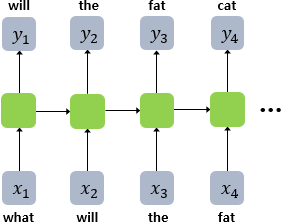

1. 훈련이 끝난 모델
- 예측 과정에서 이전 시점의 출력을 현재 시점의 입력으로 합니다. 
- what을 입력받으면, will을 예측
- 훈련이 끝난 모델의 테스트 과정 동안(실제 사용할 때)의 이야기

2. 모델의 훈련 과정
- 이전 시점의 예측 결과를 다음 시점의 입력으로 넣으면서 예측하는 것이 아니라, <br>
- what will the fat cat sit on라는 훈련 샘플이 있다면, <br>
- what will the fat cat sit 시퀀스를 모델의 입력으로 넣으면, <br>
- will the fat cat sit on를 예측하도록 훈련<br>
=> 이러한 RNN 훈련 기법을 **교사 강요(teacher forcing)** 라고 합니다. 

**교사 강요(teacher forcing)** <br>
- RNN의 모든 시점에 대해서 이전 시점의 예측값 대신 실제값을 입력으로 주는 방법
- 테스트 과정에서 t 시점의 출력이 t+1 시점의 입력으로 사용되는 RNN 모델을 훈련시킬 때 사용하는 훈련 기법

- 훈련할 때 교사 강요를 사용할 경우, 모델이 t 시점에서 예측한 값을 t+1 시점에 입력으로 사용하지 않고, t 시점의 레이블. 즉, 실제 알고있는 정답을 t+1 시점의 입력으로 사용
- 훈련 과정에서도 테스트 과정처럼 훈련 시킬 수 있지만, 이는 한 번 잘못 예측 시에 뒤의 예측까지 영향을 미쳐 훈련 시간이 느려지게 되어 비효율적

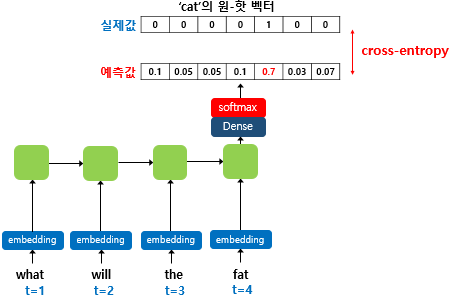

- 훈련 과정 동안 출력층에서는 softmax를 활성화 함수로 사용
- cross-entropy 함수는 모델 예측 값과 실제 레이블과의 오차 계산 위한 손실 함수로 사용

**이해를 돕기 위해 앞서 배운 NNLM의 그림과 유사한 형태로 RNNLM을 다시 시각화**

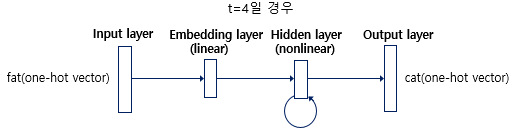

- 모델이 예측해야하는 정답에 해당되는 단어 cat의 원-핫 벡터는 출력층에서 모델이 예측한 값의 오차를 구하기 위해 사용될 예정
- 그리고 이 오차로부터 손실 함수를 사용해 인공 신경망이 학습을 하게 됩니다

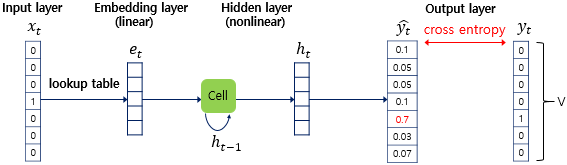

1. 입력 단어의 원-핫 벡터 $X_t$ 를 입력 받은 RNNLM은 우선 임베딩층(embedding layer)을 지납니다. 
    - 임베딩층은 기본적으로 NNLM에서 배운 투사층으로, 임베딩 벡터를 얻는 투사층을 임베딩층(embedding layer)이라는 표현을 사용)
2. 단어 집합의 크기가 V일 때, 임베딩 벡터의 크기를 M으로 설정하면, 각 입력 단어들은 임베딩층에서 V × M 크기의 임베딩 행렬과 곱해집니다. 
    - V는 단어 집합의 크기
    - 원-핫 벡터의 차원이 7이고, M이 5라면 임베딩 행렬은 7 × 5 행렬
    - 이 임베딩 행렬은 역전파 과정에서 다른 가중치들과 함께 학습
    - 임베딩층 : $e_t = lookup(x_t)$
3. 이 임베딩 벡터는 은닉층에서 이전 시점의 은닉 상태인 $h_{t-1}$과 함께 다음의 연산을 하여 현재 시점의 은닉 상태 $h_t$를 계산하게 됩니다.
    - 은닉층 : $h_t = tanh(W_xe_t + W_hh_{t-1}+b)$
    - 은닉층의 활성화 함수 로 하이퍼볼릭 탄젠트 함수 $tanh$

혼공머신 490p
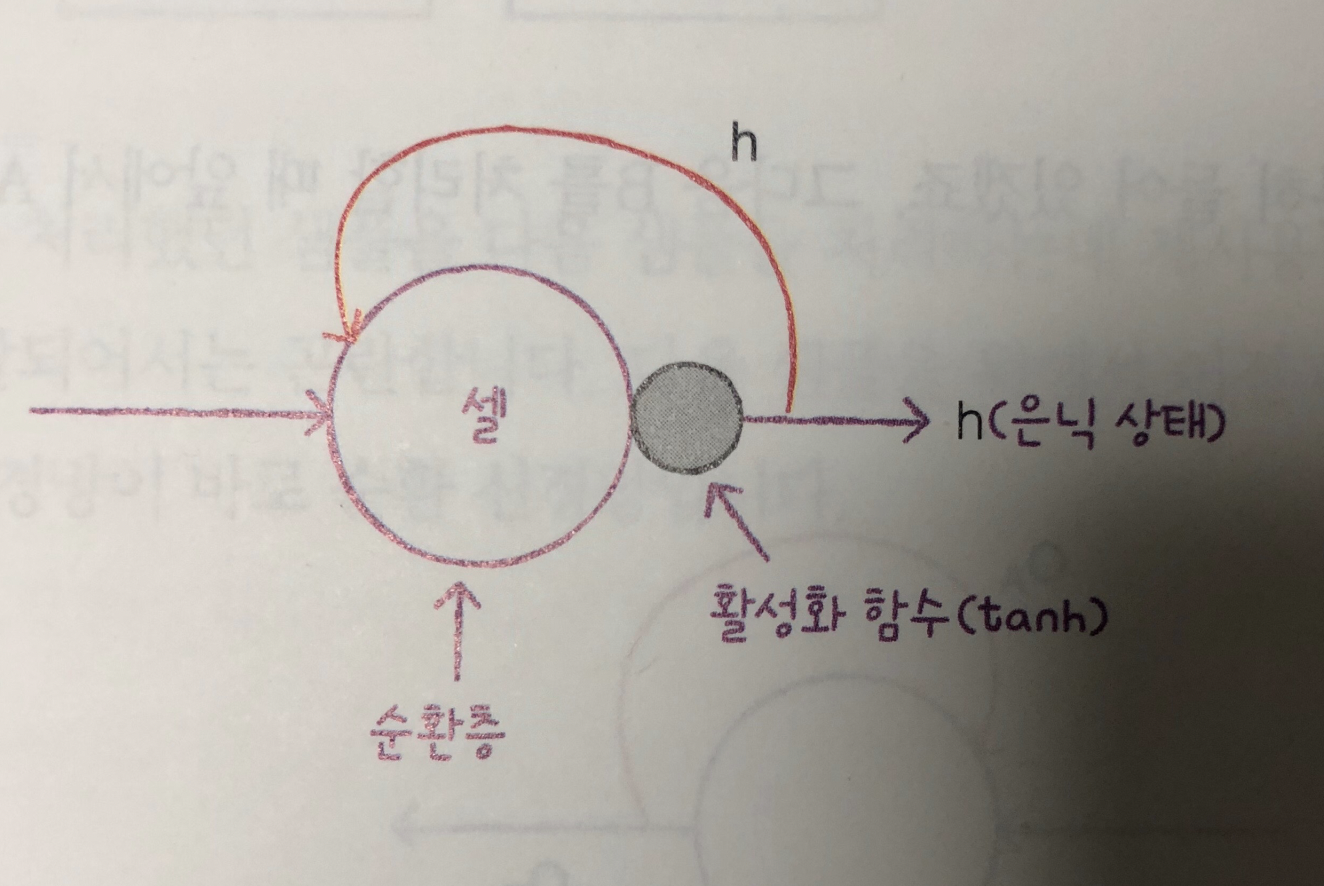

4. 출력층에서는 활성화 함수로 소프트맥스(softmax) 함수를 사용
    - V차원의 벡터는 소프트맥스 함수를 지나면서 각 원소는 0과 1사이의 실수값을 가지며 총 합은 1이 되는 상태로 바뀝니다.
    - RNNLM의 t시점의 예측값이라는 의미에서 $\hat{y}_t$ 라고 함
    - 출력층 : $\hat{y}_t = softmat(W_yh_t+b)$
    - 실제값에 해당되는 다음 단어를 y 라고 했을 때, 이 두 벡터가 가까워지게 하기위해서 RNNLM는 손실 함수로 cross-entropy 함수를 사용합니다. 
    - 그리고 역전파가 이루어지면서 가중치 행렬들이 학습되는데, 이 과정에서 임베딩 벡터값들도 학습이 됩니다.
5. 룩업 테이블의 대상이 되는 테이블인 임베딩 행렬을 E 라고 하였을 때, 
    - 결과적으로 RNNLM에서 학습 과정에서 학습되는 가중치 행렬은 
    - $ E, W_x, W_h, W_y$ 4개

---

## 6) RNN을 이용한 텍스트 생성(Text Generation using RNN)
- 다 대 일(many-to-one) 구조의 RNN을 사용하여 문맥을 반영해서 텍스트를 생성하는 모델 만들기 실습

### 1. RNN을 이용하여 텍스트 생성하기

```
'경마장에 있는 말이 뛰고 있다'
'그의 말이 법이다'
'가는 말이 고와야 오는 말이 곱다'
```

- 모델이 문맥을 학습할 수 있도록 전체 문장의 앞의 단어들을 전부 고려하여 학습하도록 데이터를 재구성

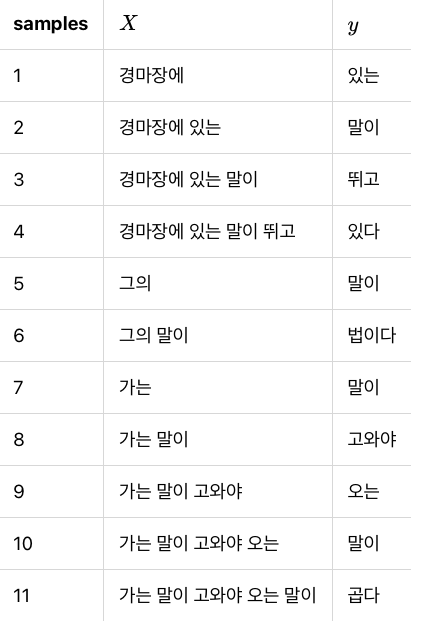

#### 1) 데이터에 대한 이해와 전처리

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

# 패딩을 위한 0을 고려하여 +1
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [4]:
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


- 훈련 데이터를 만들기

In [5]:
sequences = list()
for line in text.split('\n'): # Wn을 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


- 아직 레이블로 사용될 단어를 분리하지 않은 훈련 데이터
- 전체 훈련 데이터에 대해서 맨 우측에 있는 단어에 대해서만 레이블로 분리

In [6]:
sequences
#[2, 3][경마장에, 있는]
#[2, 3, 1][경마장에, 있는, 말이]

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

- 가장 긴 샘플의 길이를 기준으로 전체 샘플에 대해서 길이를 일치시켜 준다.

In [7]:
# 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [8]:
# 전체 샘플의 길이를 6으로 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [9]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


- 각 샘플의 마지막 단어를 레이블로 분리

In [10]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1] # 레이블

In [11]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [12]:
print(y) # 모든 샘플에 대한 레이블 출력

[ 3  1  4  5  1  7  1  9 10  1 11]


- RNN 모델에 훈련 데이터를 훈련 시키기 전에 레이블에 대해서 원-핫 인코딩을 수행

In [13]:
y = to_categorical(y, num_classes=vocab_size)

In [14]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


```
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] # 3에 대한 원-핫 벡터
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] # 1에 대한 원-핫 벡터
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] # 4에 대한 원-핫 벡터
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] # 5에 대한 원-핫 벡터
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] # 1에 대한 원-핫 벡터
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] # 7에 대한 원-핫 벡터
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] # 1에 대한 원-핫 벡터
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] # 9에 대한 원-핫 벡터
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] # 10에 대한 원-핫 벡터
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] # 1에 대한 원-핫 벡터
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] # 11에 대한 원-핫 벡터
```

---

#### 2) 모델 설계하기

- RNN 모델에 데이터를 훈련시킨다.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [16]:
%%time
embedding_dim = 10 # 임베딩 벡터의 차원
hidden_units = 32 # 은닉 상태의 크기

model = Sequential()
# 단어 집합 크기(12)만큼의 뉴런을 배치하여 모델을 설계
model.add(Embedding(vocab_size, embedding_dim))
# 다중 클래스 분류 문제
model.add(SimpleRNN(hidden_units))
# 출력층에 소프트맥스 회귀를 사용
model.add(Dense(vocab_size, activation='softmax'))
# 손실 함수로 크로스 엔트로피 함수를 사용
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

2022-03-17 22:24:22.188161: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/200
1/1 - 0s - loss: 2.4798 - accuracy: 0.0909 - 264ms/epoch - 264ms/step
Epoch 2/200
1/1 - 0s - loss: 2.4648 - accuracy: 0.0909 - 2ms/epoch - 2ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4496 - accuracy: 0.0909 - 2ms/epoch - 2ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4341 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4182 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4017 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 7/200
1/1 - 0s - loss: 2.3846 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3668 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3481 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3285 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3079 - accuracy: 0.4545 - 2ms/epoch - 2ms/step
Epoch 12/200
1/1 - 0s - loss: 2.2863 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 13/200
1/1 - 0s - loss: 2.2637 - accuracy: 0.3636 -

- 모델이 정확하게 예측하고 있는지 문장을 생성하는 함수를 만들어서 출력

In [26]:
                        # 모델, 토크나이저, 현재 단어, 반복할 횟수
def sentence_generation(model, tokenizer, current_word, n):
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [27]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [28]:
print(sentence_generation(model, tokenizer, '그의', 2))

그의 말이 법이다


In [29]:
print(sentence_generation(model, tokenizer, '가는', 5))

가는 말이 고와야 오는 말이 곱다


### 2. LSTM을 이용하여 텍스트 생성하기

- 더 많은 훈련 데이터를 가지고 실습

#### 1) 데이터에 대한 이해와 전처리

- kaggle 뉴욕 타임즈 기사의 제목 <br>
https://www.kaggle.com/aashita/nyt-comments?select=ArticlesApril2018.csv

In [23]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [60]:
df = pd.read_csv('New_York_Times_Comments/ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [31]:
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [32]:
print(df['headline'].isnull().values.any())

False


In [33]:
headline = []
# 헤드라인의 값들을 리스트로 저장
headline.extend(list(df.headline.values)) 
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [34]:
print('총 샘플의 개수 : {}'.format(len(headline))) # 현재 샘플의 개수

총 샘플의 개수 : 1324


In [35]:
 # Unknown 값을 가진 샘플 제거
headline = [word for word in headline if word != "Unknown"]
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))

노이즈값 제거 후 샘플의 개수 : 1214


In [37]:
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

- 데이터 전처리
- 구두점 단어의 소문자화

In [38]:
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()

preporcessed_headline = [repreprocessing(x) for x in headline]
preporcessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preporcessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


- 정수 인코딩을 진행하는 동시에 하나의 문장을 여러 줄로 분해하여 훈련 데이터를 구성

In [44]:
sequences = list()

for sentence in preporcessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

```
[[99, 269], # former nfl
 [99, 269, 371], # former nfl cheerleaders
 [99, 269, 371, 1115], # former nfl cheerleaders settlement
 [99, 269, 371, 1115, 582], # former nfl cheerleaders settlement offer
 [99, 269, 371, 1115, 582, 52], # 'former nfl cheerleaders settlement offer 1
 [99, 269, 371, 1115, 582, 52, 7], # former nfl cheerleaders settlement offer 1 and
 [99, 269, 371, 1115, 582, 52, 7, 2], # ... 이하 생략 ...
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116], # 모든 단어가 사용된 완전한 첫번째 문장
 # 바로 위의 줄은 : former nfl cheerleaders settlement offer 1 and a meeting with goodell
 [100, 3]] # epa to에 해당되며 두번째 문장이 시작됨.
 ```

- 아직 예측할 단어에 해당되는 레이블을 분리하는 작업까지는 수행하지 않은 상태

In [45]:
index_to_word = {}
# 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
for key, value in tokenizer.word_index.items():
    index_to_word[value] = key

print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))

빈도수 상위 582번 단어 : offer


- 전체 샘플의 길이를 동일하게 만드는 패딩 작업을 수행

In [46]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 24


In [47]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


-  맨 우측 단어만 레이블로 분리

In [48]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [49]:
print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


In [50]:
print(y[:3])

[ 269  371 1115]


- y에 대해서 원-핫 인코딩을 수행

In [51]:
y = to_categorical(y, num_classes=vocab_size)

In [52]:
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### 2) 모델 설계하기

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [54]:
%%time
# 임베딩 벡터의 차원은 10
embedding_dim = 10
# 은닉 상태의 크기는 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
# 다 대 일 구조의 LSTM을 사용
model.add(LSTM(hidden_units))
# 단어 집합 크기만큼의 뉴런을 배치하여 모델을 설계
# 다중 클래스 분류 문제, 출력층에 소프트맥스 회귀
model.add(Dense(vocab_size, activation='softmax'))
# 손실 함수로 크로스 엔트로피 함수를 사용
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 3s - loss: 7.6358 - accuracy: 0.0296 - 3s/epoch - 14ms/step
Epoch 2/200
244/244 - 3s - loss: 7.1188 - accuracy: 0.0314 - 3s/epoch - 12ms/step
Epoch 3/200
244/244 - 3s - loss: 6.9850 - accuracy: 0.0329 - 3s/epoch - 12ms/step
Epoch 4/200
244/244 - 3s - loss: 6.8609 - accuracy: 0.0410 - 3s/epoch - 12ms/step
Epoch 5/200
244/244 - 3s - loss: 6.7158 - accuracy: 0.0428 - 3s/epoch - 12ms/step
Epoch 6/200
244/244 - 3s - loss: 6.5528 - accuracy: 0.0468 - 3s/epoch - 12ms/step
Epoch 7/200
244/244 - 3s - loss: 6.3673 - accuracy: 0.0523 - 3s/epoch - 12ms/step
Epoch 8/200
244/244 - 3s - loss: 6.1711 - accuracy: 0.0555 - 3s/epoch - 12ms/step
Epoch 9/200
244/244 - 3s - loss: 5.9812 - accuracy: 0.0596 - 3s/epoch - 12ms/step
Epoch 10/200
244/244 - 3s - loss: 5.7950 - accuracy: 0.0656 - 3s/epoch - 12ms/step
Epoch 11/200
244/244 - 3s - loss: 5.6222 - accuracy: 0.0681 - 3s/epoch - 12ms/step
Epoch 12/200
244/244 - 3s - loss: 5.4576 - accuracy: 0.0729 - 3s/epoch - 12ms/step
Epoch 13/200


In [55]:
                        # 모델, 토크나이저, 현재 단어, 반복할 횟수
def sentence_generation(model, tokenizer, current_word, n):
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [56]:
print(sentence_generation(model, tokenizer, 'i', 10))

i cant jump ship from facebook yet police that cant student


In [57]:
print(sentence_generation(model, tokenizer, 'how', 10))

how to make a crossword puzzle a lawman try just play


In [59]:
# How a Bag of Texas Dirt  Became a Times Tradition
print(sentence_generation(model, tokenizer, 'how a', 8))

how a bag of texas dirt became a times tradition


---

## 7) 문자 단위 RNN(Char RNN)

### 1) 문자 단위 RNN 언어 모델(Char RNNLM)

#### 1) 데이터 이해와 전처리

In [22]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

# 데이터 로드
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # 데이터로부터 한 줄씩 읽는다.
    sentence = sentence.strip() # strip()을 통해 \r, \n을 제거한다.
    sentence = sentence.lower() # 소문자화.
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()

In [23]:
# 데이터 확인
sentences[:5]

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. you may copy it, give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at']

In [24]:
total_data = ' '.join(sentences)
print('문자열의 길이 또는 총 문자의 개수: %d' % len(total_data))
print(total_data[:200])

문자열의 길이 또는 총 문자의 개수: 159484
the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with


In [25]:
char_vocab = sorted(list(set(total_data)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

# 문자에 고유한 정수 부여
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print('문자 집합 :',char_to_index)

문자 집합의 크기 : 56
문자 집합 : {' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}


In [26]:
# key, value 바꾼 dict 생성
index_to_char = {}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [27]:
# appl (입력 시퀀스) -> pple (예측해야하는 시퀀스)
train_X = 'appl'
train_y = 'pple'

In [28]:
seq_length = 60

# 문자열의 길이를 seq_length로 나누면 전처리 후 생겨날 샘플 수, floor(내림 함수)
n_samples = int(np.floor((len(total_data) - 1) / seq_length))
print ('샘플의 수 : {}'.format(n_samples))

샘플의 수 : 2658


In [29]:
train_X = []
train_y = []

for i in range(n_samples):
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 pick. (slicing)
    X_sample = total_data[i * seq_length: (i + 1) * seq_length]

    # 정수 인코딩
    X_encoded = [char_to_index[c] for c in X_sample]
    train_X.append(X_encoded)

    # 오른쪽으로 1칸 쉬프트(slicing)
    y_sample = total_data[i * seq_length + 1: (i + 1) * seq_length + 1]
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

In [30]:
print('X 데이터의 첫번째 샘플 :',train_X[0])
print('y 데이터의 첫번째 샘플 :',train_y[0])
print('-'*50)
print('X 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_X[0]])
print('y 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_y[0]])

X 데이터의 첫번째 샘플 : [49, 37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30]
y 데이터의 첫번째 샘플 : [37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30, 43]
--------------------------------------------------
X 데이터의 첫번째 샘플 디코딩 : ['t', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'o', 'f', ' ', 'a', 'l', 'i', 'c', 'e', 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'l', 'a']
y 데이터의 첫번째 샘플 디코딩 : ['h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e',

In [31]:
xx = {len(i) for i in train_X}
yy = {len(i) for i in train_y}

print(xx)
print(yy)

{60}
{60}


In [32]:
# One-Hot encoding
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

print('train_X의 크기(shape) : {}'.format(train_X.shape)) # 원-핫 인코딩
print('train_y의 크기(shape) : {}'.format(train_y.shape)) # 원-핫 인코딩

# 이는 샘플의 수(No. of samples)가 2,658개(데이터의의 수, 행), 
# 입력 시퀀스의 길이(input_length)가 60(각 데이터의 길이), 
# 각 벡터의 차원(input_dim)이 56(원-핫 인코딩 결과(해당 문서의 문자의 종류가 56개) 임을 의미
# 원-핫 벡터의 차원은 문자 집합의 크기인 56이어야 하므로 원-핫 인코딩이 수행되었음을 알 수 있음

train_X의 크기(shape) : (2658, 60, 56)
train_y의 크기(shape) : (2658, 60, 56)


---

#### 2) 모델 설계

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

# 하이퍼파라미터인 은닉 상태의 크기는 256입니다.
hidden_units = 256

model = Sequential()
# 모델은 다 대 다 구조의 LSTM을 사용하며, LSTM 은닉층은 두 개를 사용합니다. 
# By using None in the input_shape like that, you are already telling your model that it accepts sequences in any length.
model.add(LSTM(hidden_units, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
# 전결합층(Fully Connected Layer)을 출력층으로 문자 집합 크기만큼의 뉴런을 배치하여 모델을 설계합니다. 
# 해당 모델은 모든 시점에서 모든 가능한 문자 중 하나의 문자를 예측하는 다중 클래스 분류 문제를 수행하는 모델입니다. 
# 출력층에 소프트맥스 회귀를 사용해야 하므로 활성화 함수로는 소프트맥스 함수를 사용하고, 
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

# 손실 함수로 크로스 엔트로피 함수를 사용하여 80 에포크를 수행합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

2022-03-18 21:01:58.290547: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/80
84/84 - 13s - loss: 3.0682 - accuracy: 0.1825 - 13s/epoch - 159ms/step
Epoch 2/80
84/84 - 12s - loss: 2.7361 - accuracy: 0.2486 - 12s/epoch - 146ms/step
Epoch 3/80
84/84 - 13s - loss: 2.3996 - accuracy: 0.3284 - 13s/epoch - 150ms/step
Epoch 4/80
84/84 - 13s - loss: 2.2634 - accuracy: 0.3576 - 13s/epoch - 155ms/step
Epoch 5/80
84/84 - 13s - loss: 2.1661 - accuracy: 0.3833 - 13s/epoch - 158ms/step
Epoch 6/80
84/84 - 14s - loss: 2.0854 - accuracy: 0.4017 - 14s/epoch - 165ms/step
Epoch 7/80
84/84 - 14s - loss: 2.0173 - accuracy: 0.4181 - 14s/epoch - 168ms/step
Epoch 8/80
84/84 - 16s - loss: 1.9676 - accuracy: 0.4297 - 16s/epoch - 185ms/step
Epoch 9/80
84/84 - 15s - loss: 1.9126 - accuracy: 0.4453 - 15s/epoch - 183ms/step
Epoch 10/80
84/84 - 16s - loss: 1.8699 - accuracy: 0.4575 - 16s/epoch - 187ms/step
Epoch 11/80
84/84 - 17s - loss: 1.8292 - accuracy: 0.4681 - 17s/epoch - 199ms/step
Epoch 12/80
84/84 - 18s - loss: 1.7886 - accuracy: 0.4798 - 18s/epoch - 212ms/step
Epoch 13/80
8

In [34]:
def sentence_generation(model, length):
    # 문자에 대한 랜덤한 정수 생성
    ix = [np.random.randint(vocab_size)]

    # 랜덤한 정수로부터 맵핑되는 문자 생성
    y_char = [index_to_char[ix[-1]]]
    print(ix[-1],'번 문자',y_char[-1],'로 예측을 시작!')

    # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성
    X = np.zeros((1, length, vocab_size))

    for i in range(length):
        # X[0][i][예측한 문자의 인덱스] = 1, 즉, 예측 문자를 다음 입력 시퀀스에 추가
        X[0][i][ix[-1]] = 1
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)

In [ ]:
result = sentence_generation(model, 100)
print(result)

55 번 문자 z 로 예측을 시작!
zard) could not make out at all what had become of it; so, aftio alich haster of any here. the queenzard) could not make out at all what had become of it; so, aftio alich haster of any here. the queen 


### 2) 문자 단위 RNN(Char RNN)으로 텍스트 생성하기

#### 1) 데이터 이해와 전처리

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

# 하나의 문자열로 재저장
tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(raw_text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


In [ ]:
# 중복을 제거한 문자 집합 생성
char_vocab = sorted(list(set(raw_text)))
vocab_size = len(char_vocab)
print('문자 집합 :',char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합 : [' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
문자 집합의 크기 : 33


In [ ]:
# 문자에 고유한 정수 인덱스 부여
char_to_index = dict((char, index) for index, char in enumerate(char_vocab)) 
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [ ]:
# 예를 들어 훈련 데이터에 student라는 단어가 있고 시퀀스 길이가 5인 경우의 예
# stude -> n
# tuden -> t
# 5개의 입력 문자 시퀀스로부터 다음 문자 시퀀스를 예측하는 것입니다. 
# 즉, RNN의 시점(timesteps)은 5번

In [ ]:
# 입력 시퀀스의 길이가 10이 되도록 데이터를 구성, 예측 대상인 문자도 필요하므로 길이가 11이 되도록 데이터를 구성
length = 11
sequences = []
for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i] # 길이 11의 문자열을 지속적으로 만든다.
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))
print(sequences[:10])

총 훈련 샘플의 수: 426
['I get on wi', ' get on wit', 'get on with', 'et on with ', 't on with l', ' on with li', 'on with lif', 'n with life', ' with life ', 'with life a']


In [ ]:
# 정수 인코딩 수행
encoded_sequences = []
for sequence in sequences: # 전체 데이터에서 문장 샘플을 1개씩 꺼낸다.
    encoded_sequence = [char_to_index[char] for char in sequence] # 문장 샘플에서 각 문자에 대해서 정수 인코딩을 수행.
    encoded_sequences.append(encoded_sequence)

encoded_sequences[:5]

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18],
 [0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28],
 [16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17],
 [14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0],
 [28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]]

In [ ]:
# 예측 대상인 문자를 분리시켜주는 작업
# 모든 샘플 문장에 대해서 마지막 문자를 분리하여 마지막 문자가 분리된 샘플은 X_data에 저장하고, 마지막 문자는 y_data에 저장
encoded_sequences = np.array(encoded_sequences)

# 맨 마지막 위치의 문자를 분리
X_data = encoded_sequences[:,:-1]
# 맨 마지막 위치의 문자를 저장
y_data = encoded_sequences[:,-1]
print(X_data[:5])
print(y_data[:5])

[[ 8  0 16 14 28  0 24 23  0 31]
 [ 0 16 14 28  0 24 23  0 31 18]
 [16 14 28  0 24 23  0 31 18 28]
 [14 28  0 24 23  0 31 18 28 17]
 [28  0 24 23  0 31 18 28 17  0]]
[18 28 17  0 21]


In [ ]:
# 원-핫 인코딩
X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)
print(X_data_one_hot.shape)

(426, 10, 33)


#### 2) 모델 설계하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 하이퍼파라미터인 은닉 상태의 크기는 64입니다.
hidden_units = 64

# 모델은 다 대 일 구조의 LSTM을 사용합니다.
model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
# 전결합층(Fully Connected Layer)을 출력층으로 문자 집합 크기만큼의 뉴런을 배치하여 모델을 설계합니다.
# 다중 클래스 분류 문제의 경우, 출력층에 소프트맥스 회귀를 사용해야 하므로 활성화 함수로는 소프트맥스 함수를 사용
model.add(Dense(vocab_size, activation='softmax'))

# 다중 클래스 분류 문제의 경우,  손실 함수로 크로스 엔트로피 함수를 사용하여 100 에포크를 수행합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_data_one_hot, y_data_one_hot, epochs=100, verbose=2)

Epoch 1/100
14/14 - 3s - loss: 3.4770 - accuracy: 0.1033 - 3s/epoch - 183ms/step
Epoch 2/100
14/14 - 0s - loss: 3.3857 - accuracy: 0.1948 - 175ms/epoch - 13ms/step
Epoch 3/100
14/14 - 0s - loss: 3.1239 - accuracy: 0.1972 - 99ms/epoch - 7ms/step
Epoch 4/100
14/14 - 0s - loss: 3.0125 - accuracy: 0.1972 - 99ms/epoch - 7ms/step
Epoch 5/100
14/14 - 0s - loss: 2.9748 - accuracy: 0.1972 - 96ms/epoch - 7ms/step
Epoch 6/100
14/14 - 0s - loss: 2.9520 - accuracy: 0.1972 - 102ms/epoch - 7ms/step
Epoch 7/100
14/14 - 0s - loss: 2.9366 - accuracy: 0.1972 - 113ms/epoch - 8ms/step
Epoch 8/100
14/14 - 0s - loss: 2.9197 - accuracy: 0.1972 - 148ms/epoch - 11ms/step
Epoch 9/100
14/14 - 0s - loss: 2.9032 - accuracy: 0.1972 - 112ms/epoch - 8ms/step
Epoch 10/100
14/14 - 0s - loss: 2.8884 - accuracy: 0.1972 - 95ms/epoch - 7ms/step
Epoch 11/100
14/14 - 0s - loss: 2.8582 - accuracy: 0.1972 - 100ms/epoch - 7ms/step
Epoch 12/100
14/14 - 0s - loss: 2.8334 - accuracy: 0.1972 - 96ms/epoch - 7ms/step
Epoch 13/100
14/1

In [ ]:
def sentence_generation(model, char_to_index, seq_length, seed_text, n):

    # 초기 시퀀스
    init_text = seed_text
    sentence = ''

    # 다음 문자 예측은 총 n번만 반복.
    for _ in range(n):
        encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = to_categorical(encoded, num_classes=len(char_to_index))

        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 문자)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for char, index in char_to_index.items():
            if index == result:
                break

        # 현재 시퀀스 + 예측 문자를 현재 시퀀스로 변경
        seed_text = seed_text + char

        # 예측 문자를 문장에 저장
        sentence = sentence + char

    # n번의 다음 문자 예측이 끝나면 최종 완성된 문장을 리턴.
    sentence = init_text + sentence
    return sentence

In [ ]:
print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))

I get on with lofe arer . uut hesrrrrat mt we draprrrrmmm mr Iddaarrr m.. B I aap  o oerrr
